# Investigación 2

## Tareas previas

### Selección de conjunto de datos

Para esta investigación se empleará el conjunto de datos "Bank Marketing Data Set", obtenido de https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#. Del conjunto de datos, se decidió acondicionar la información del archivo bank-additional.csv

In [1]:
import numpy as np
import pandas as pd

Se carga el archivo:

In [2]:
bank_data_set = pd.read_csv(r'bank-additional.csv')

Visualizamos las primeras lineas:

In [3]:
bank_data_set.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Se reemplazan los "yes" y "no" por 1 y 0 respectivamente y se muestra el resultado preliminar.

In [4]:
bank_data_set.replace(('yes', 'no'), (1, 0), inplace=True)
bank_data_set.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,0,1,0,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,0,0,0,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,0,1,0,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,0,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,0,1,0,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


Se reemplazan los "unknown" de la categoría "job" por otro y de inmediato se sustituyen los NaN por la media de cada columna. Finalmente se redondea el resultado obtenido.

In [5]:
# Sustituye unknown por NaN.
bank_data_set.replace(to_replace='unknown', value = np.nan, inplace = True)

# Asigna la media de la columna para cada NaN.
bank_data_set.fillna(value=bank_data_set.mean(), inplace = True)

print(bank_data_set.isna().sum())

# Redondea los valores de cada celda.
bank_data_set = bank_data_set.round()

# Muestra el resultado
bank_data_set.head()

age                 0
job                39
marital            11
education         167
default             0
housing             0
loan                0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,0.0,1.0,0.0,cellular,may,fri,...,2,999,0,nonexistent,-2.0,93.0,-46.0,1.0,5099.0,0
1,39,services,single,high.school,0.0,0.0,0.0,telephone,may,fri,...,4,999,0,nonexistent,1.0,94.0,-36.0,5.0,5191.0,0
2,25,services,married,high.school,0.0,1.0,0.0,telephone,jun,wed,...,1,999,0,nonexistent,1.0,94.0,-42.0,5.0,5228.0,0
3,38,services,married,basic.9y,0.0,1.0,0.0,telephone,jun,fri,...,3,999,0,nonexistent,1.0,94.0,-42.0,5.0,5228.0,0
4,47,admin.,married,university.degree,0.0,1.0,0.0,cellular,nov,mon,...,1,999,0,nonexistent,-0.0,93.0,-42.0,4.0,5196.0,0


Se procede a codificar las columnas que no cuentan con un tipo numérico en sus parámetros.

Nótese que hay categorías en las que no fue posible sustituir el NaN por el valor medio. Esto se debe a que los parámetros de no son valores numéricos. Por ello, procedemos a codificar las distintas variables con números que se mapean a cada valor de la variable.

In [6]:
# Obtengo una lista de las distintas variables para la columna "job"
job_coding = pd.unique(bank_data_set['job'])

# Muestro el mapeo que se usará
print('Codificación para la categoría job: \n')
for index in range(len(job_coding)):
    bank_data_set['job'].replace(to_replace = job_coding[index], value = index + 1, inplace = True)
    print(job_coding[index], ' = ', index + 1)
bank_data_set.head()

Codificación para la categoría job: 

blue-collar  =  1
services  =  2
admin.  =  3
entrepreneur  =  4
self-employed  =  5
technician  =  6
management  =  7
student  =  8
retired  =  9
housemaid  =  10
unemployed  =  11
nan  =  12


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1.0,married,basic.9y,0.0,1.0,0.0,cellular,may,fri,...,2,999,0,nonexistent,-2.0,93.0,-46.0,1.0,5099.0,0
1,39,2.0,single,high.school,0.0,0.0,0.0,telephone,may,fri,...,4,999,0,nonexistent,1.0,94.0,-36.0,5.0,5191.0,0
2,25,2.0,married,high.school,0.0,1.0,0.0,telephone,jun,wed,...,1,999,0,nonexistent,1.0,94.0,-42.0,5.0,5228.0,0
3,38,2.0,married,basic.9y,0.0,1.0,0.0,telephone,jun,fri,...,3,999,0,nonexistent,1.0,94.0,-42.0,5.0,5228.0,0
4,47,3.0,married,university.degree,0.0,1.0,0.0,cellular,nov,mon,...,1,999,0,nonexistent,-0.0,93.0,-42.0,4.0,5196.0,0


El valor $12$ corresponde a los valores NaN. Lo sustituiremos por la media.

In [7]:
# Sustituye 12 por la media.
bank_data_set["job"].replace(to_replace=12, value = bank_data_set["job"].mean(), inplace = True)

Ahora para la columna de estado marital:

In [8]:
marital_coding = pd.unique(bank_data_set['marital'])

print('Codificación para la categoría marital: \n')
for index in range(len(marital_coding)):
    bank_data_set['marital'].replace(to_replace = marital_coding[index], value = index + 1, inplace = True)
    print(marital_coding[index], ' = ', index + 1)
bank_data_set.head()

Codificación para la categoría marital: 

married  =  1
single  =  2
divorced  =  3
nan  =  4


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1.0,1.0,basic.9y,0.0,1.0,0.0,cellular,may,fri,...,2,999,0,nonexistent,-2.0,93.0,-46.0,1.0,5099.0,0
1,39,2.0,2.0,high.school,0.0,0.0,0.0,telephone,may,fri,...,4,999,0,nonexistent,1.0,94.0,-36.0,5.0,5191.0,0
2,25,2.0,1.0,high.school,0.0,1.0,0.0,telephone,jun,wed,...,1,999,0,nonexistent,1.0,94.0,-42.0,5.0,5228.0,0
3,38,2.0,1.0,basic.9y,0.0,1.0,0.0,telephone,jun,fri,...,3,999,0,nonexistent,1.0,94.0,-42.0,5.0,5228.0,0
4,47,3.0,1.0,university.degree,0.0,1.0,0.0,cellular,nov,mon,...,1,999,0,nonexistent,-0.0,93.0,-42.0,4.0,5196.0,0


El valor $4$ corresponde a NaN. Lo sustituimos por la media.

In [9]:
# Sustituye 4 por la media.
bank_data_set["marital"].replace(to_replace=4, value = bank_data_set["marital"].mean(), inplace = True)

Hacemos lo mismo para la categoría "education".

In [10]:
education_coding = pd.unique(bank_data_set['education'])

print('Codificación para la categoría education: \n')
for index in range(len(education_coding)):
    bank_data_set['education'].replace(to_replace = education_coding[index], value = index + 1, inplace = True)
    print(education_coding[index], ' = ', index + 1)
bank_data_set.head()

Codificación para la categoría education: 

basic.9y  =  1
high.school  =  2
university.degree  =  3
professional.course  =  4
basic.6y  =  5
basic.4y  =  6
nan  =  7
illiterate  =  8


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1.0,1.0,1,0.0,1.0,0.0,cellular,may,fri,...,2,999,0,nonexistent,-2.0,93.0,-46.0,1.0,5099.0,0
1,39,2.0,2.0,2,0.0,0.0,0.0,telephone,may,fri,...,4,999,0,nonexistent,1.0,94.0,-36.0,5.0,5191.0,0
2,25,2.0,1.0,2,0.0,1.0,0.0,telephone,jun,wed,...,1,999,0,nonexistent,1.0,94.0,-42.0,5.0,5228.0,0
3,38,2.0,1.0,1,0.0,1.0,0.0,telephone,jun,fri,...,3,999,0,nonexistent,1.0,94.0,-42.0,5.0,5228.0,0
4,47,3.0,1.0,3,0.0,1.0,0.0,cellular,nov,mon,...,1,999,0,nonexistent,-0.0,93.0,-42.0,4.0,5196.0,0


In [11]:
# Sustituye 7 por la media.
bank_data_set["education"].replace(to_replace=7, value = bank_data_set["education"].mean(), inplace = True)

Categoría "contact"

In [12]:
contact_coding = pd.unique(bank_data_set['contact'])

print('Codificación para la categoría contact: \n')
for index in range(len(contact_coding)):
    bank_data_set['contact'].replace(to_replace = contact_coding[index], value = index + 1, inplace = True)
    print(contact_coding[index], ' = ', index + 1)
bank_data_set.head()

Codificación para la categoría contact: 

cellular  =  1
telephone  =  2


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1.0,1.0,1.0,0.0,1.0,0.0,1,may,fri,...,2,999,0,nonexistent,-2.0,93.0,-46.0,1.0,5099.0,0
1,39,2.0,2.0,2.0,0.0,0.0,0.0,2,may,fri,...,4,999,0,nonexistent,1.0,94.0,-36.0,5.0,5191.0,0
2,25,2.0,1.0,2.0,0.0,1.0,0.0,2,jun,wed,...,1,999,0,nonexistent,1.0,94.0,-42.0,5.0,5228.0,0
3,38,2.0,1.0,1.0,0.0,1.0,0.0,2,jun,fri,...,3,999,0,nonexistent,1.0,94.0,-42.0,5.0,5228.0,0
4,47,3.0,1.0,3.0,0.0,1.0,0.0,1,nov,mon,...,1,999,0,nonexistent,-0.0,93.0,-42.0,4.0,5196.0,0


Para la columna "month", haremos una codificación especial para asegurarnos de considerar todos los meses.

In [13]:
months = {
    "jan":1,
    "feb":2,
    "mar":3,
    "apr":4,
    "may":5,
    "jun":6,
    "jul":7,
    "aug":8,
    "sep":9,
    "oct":10,
    "nov":11,
    "dec":12
}

for month in months.keys():
    bank_data_set['month'].replace(to_replace = month, value = months[month], inplace = True)
    print(month, ' = ', months[month])
bank_data_set.head()

jan  =  1
feb  =  2
mar  =  3
apr  =  4
may  =  5
jun  =  6
jul  =  7
aug  =  8
sep  =  9
oct  =  10
nov  =  11
dec  =  12


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1.0,1.0,1.0,0.0,1.0,0.0,1,5,fri,...,2,999,0,nonexistent,-2.0,93.0,-46.0,1.0,5099.0,0
1,39,2.0,2.0,2.0,0.0,0.0,0.0,2,5,fri,...,4,999,0,nonexistent,1.0,94.0,-36.0,5.0,5191.0,0
2,25,2.0,1.0,2.0,0.0,1.0,0.0,2,6,wed,...,1,999,0,nonexistent,1.0,94.0,-42.0,5.0,5228.0,0
3,38,2.0,1.0,1.0,0.0,1.0,0.0,2,6,fri,...,3,999,0,nonexistent,1.0,94.0,-42.0,5.0,5228.0,0
4,47,3.0,1.0,3.0,0.0,1.0,0.0,1,11,mon,...,1,999,0,nonexistent,-0.0,93.0,-42.0,4.0,5196.0,0


Igualmente lo haremos con los días de la semana.

In [14]:
days = {
    "mon":1,
    "tue":2,
    "wed":3,
    "thu":4,
    "fri":5,
    "sat":6,
    "sun":7
}

for day in days.keys():
    bank_data_set['day_of_week'].replace(to_replace = day, value = days[day], inplace = True)
    print(day, ' = ', days[day])
bank_data_set.head()

mon  =  1
tue  =  2
wed  =  3
thu  =  4
fri  =  5
sat  =  6
sun  =  7


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1.0,1.0,1.0,0.0,1.0,0.0,1,5,5,...,2,999,0,nonexistent,-2.0,93.0,-46.0,1.0,5099.0,0
1,39,2.0,2.0,2.0,0.0,0.0,0.0,2,5,5,...,4,999,0,nonexistent,1.0,94.0,-36.0,5.0,5191.0,0
2,25,2.0,1.0,2.0,0.0,1.0,0.0,2,6,3,...,1,999,0,nonexistent,1.0,94.0,-42.0,5.0,5228.0,0
3,38,2.0,1.0,1.0,0.0,1.0,0.0,2,6,5,...,3,999,0,nonexistent,1.0,94.0,-42.0,5.0,5228.0,0
4,47,3.0,1.0,3.0,0.0,1.0,0.0,1,11,1,...,1,999,0,nonexistent,-0.0,93.0,-42.0,4.0,5196.0,0


In [15]:
prev_outcome_coding = pd.unique(bank_data_set['poutcome'])

print('Codificación para la categoría poutcome: \n')
for index in range(len(prev_outcome_coding)):
    bank_data_set['poutcome'].replace(to_replace = prev_outcome_coding[index], value = index + 1, inplace = True)
    print(prev_outcome_coding[index], ' = ', index + 1)
bank_data_set.head()

Codificación para la categoría poutcome: 

nonexistent  =  1
failure  =  2
success  =  3


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1.0,1.0,1.0,0.0,1.0,0.0,1,5,5,...,2,999,0,1,-2.0,93.0,-46.0,1.0,5099.0,0
1,39,2.0,2.0,2.0,0.0,0.0,0.0,2,5,5,...,4,999,0,1,1.0,94.0,-36.0,5.0,5191.0,0
2,25,2.0,1.0,2.0,0.0,1.0,0.0,2,6,3,...,1,999,0,1,1.0,94.0,-42.0,5.0,5228.0,0
3,38,2.0,1.0,1.0,0.0,1.0,0.0,2,6,5,...,3,999,0,1,1.0,94.0,-42.0,5.0,5228.0,0
4,47,3.0,1.0,3.0,0.0,1.0,0.0,1,11,1,...,1,999,0,1,-0.0,93.0,-42.0,4.0,5196.0,0


Finalmente exportamos los datos procesados.

In [16]:
bank_data_set.to_csv("bank_data_set_Processed.csv")

### Métricas de evaluación

Estudiaremos algunas métricas empleadas para evaluar el desempeño de los algoritmos empleados para clasificación y regresión.

#### Clasificación

Antes de iniciar con las métricas más comunes es necesario describir brevemente un concepto muy empleado: la matriz de confusión.

##### Matriz de confusión

Esta matriz provee una manera de contrastar los resultados que predice el modelo contra los resultados de referencia.

<img src="./conf_matrix.png" width=40%, height=40%>
<h5><center>Figura 1. Matriz de confusión</h5></center>

La figura 1 presenta un ejemplo de esta matriz. Nótese que el título general de las columnas es "Referencia", mientras que el título general de las filas es "Predicción".
Dentro de la matriz de confusión se presentan cuatro conceptos clave, éstos son: falso positivo, falso negativo, verdadero positivo y verdadero negativo.

###### Falso positivo (FP)

Corresponde a la cantidad de predicciones que el modelo de clasificación categorizó como positivo ("Sí" en el caso de la figura 1) y según los valores de referencia, no lo era. En el caso de la figura 1, esto corresponde con 60 instancias.

###### Falso negativo (FN)

Corresponde a la cantidad de predicciones que el modelo de clasificación categorizó como negativo ("No" en el caso de la figura 1) y según los valores de referencia, no lo era. En el caso de la figura 1, esto corresponde con 40 instancias.

###### Verdadero positivo (TP)

Corresponde a la cantidad de predicciones que el modelo de clasificación categorizó como positivo (sí en el caso de la figura 1) y según los valores de referencia, están clasificados de esta manera. En el caso de la figura 1, esto corresponde con 460 instancias.

###### Verdadero negativo (TN)

Corresponde a la cantidad de predicciones que el modelo de clasificación categorizó como negativo (no en el caso de la figura 1) y según los valores de referencia, están clasificados de esta manera. En el caso de la figura 1, esto corresponde con 440 instancias.

##### Exactitud (accuracy)

Esta métrica se obtiene al sumar la cantidad de predicciones correctas del modelo y dividirlo por la cantidad de instancias.

$$
Exactitud = \frac{TP + TN}{n} * 100\%
$$


Por ejemplo: Tomando la matriz de confusión de la figura 1, se tiene que:

$$
Exactitud = \frac{440 + 460}{1000} * 100\% = 90\%
$$

##### Precisión (precision)

Existen casos en los que la exactitud no muestra correctamente el desempeño del modelo de clasificación. Esto se da cuando las instancias no se encuentran balanceadas según las clases. Por ejemplo, si se tiene un conjutno de datos para clasificar si una imagen corresponde con un gato o no, y se tienen 900 imágenes que son gatos y 100 que no lo son. Si el modelo predijese que todas las instancias son gatos, se tendría una exactitud del $90\%.$
Esto no tiene mucho sentido pues el modelo no está mostrando un comportamiento correcto al detectar las imágenes que no corresponden a gatos, aunque parece que lo está haciendo bien.

La precisión considera la proporción de la predicción verdadera (positiva o negativa) respecto a la suma de los verdaderos y falsos (positivos o negativos según corresponda). Es decir:

$$
Precisión = \frac{Verdadero}{Verdadero + Falso} * 100\%
$$

Al emplear esta métrica con los datos de la Figura 1 asumiendo que describen la clasificación binaria de gatos y no gatos, se tiene que:

$$
Precisión_{gatos} = \frac{460}{460 + 60} * 100\% = 88.46\%
$$

$$
Precisión_{no-gatos} = \frac{440}{40 + 440} * 100\% = 91.67\%
$$

##### Sensibilidad (recall)

Es la proporción de los verdaderos positivos respecto a todos los positivos en el conjunto de datos.

$$
Sensibilidad = \frac{TP}{TP + FN} * 100\%
$$

Al usar los datos de la figura 1, asumiendo que esta describe la clasificación binaria de gatos y no gatos en el conjunto de datos:

$$
Sensibilidad_{gatos} = \frac{460}{460 + 40} * 100\% = 92\%
$$

##### Especificidad

Si se calcula la misma razón, pero para los casos negativos, se denomina especificidad.

$$
Especificidad = \frac{TN}{TN + FP} * 100\%
$$

Al usar los datos de la figura 1, asumiendo que esta describe la clasificación binaria de gatos y no gatos en el conjunto de datos:

$$
Especifidad_{no-gatos} = \frac{440}{440 + 60} * 100\% = 88\%
$$

##### Puntuación F1 (F1 score)

Es posible que se desee dar prioridad a la precisión sobre la sensibilidad. Sin embargo, la puntuación F1 considera ambas métricas.
Esta se describe matemáticamente como:

$$
F_1 = \frac {2 * Precision * Sensibilidad}{Precision + Sensibilidad}
$$

Por lo que empleando los datos de la figura 1, tenemos:

$$
F_1 = \frac {2 * 88.46 * 92}{88.46 + 92} = 90.2\%
$$

#### Regresión

En el caso que el modelo se esté empleando para obtener una proyección de un valor contínuo, estamos hablando de modelos de regresión. Estos modelos se pueden evaluar con métricas como el error cuadrático medio y el error absoluto promedio.

##### Error cuadrático medio (MSE)

Este error se obtiene al calcular el cuadrado de la diferencia entre el valor esperado y el valor obtenido del modelo. Finalmente, se pondera dividiéndolo entre la cantidad de instancias.

$$
MSE = \frac{1}{n} \sum_{i=0}^n(y_i - \tilde{y_i})^2
$$

Así, por ejemplo, si nuestro modelo predice los datos $[15150, 300, 7542, 9584]$ y los datos esperados son $[15100, 302, 7535, 9575]$

El MSE viene dado por:
$$
MSE = \frac{1}{4} * \left((15150-15100)^2 + (300-302)^2 + (7542-7535)^2 + (9584-9575)^2\right)
$$

$$
MSE = 658.5
$$

##### Error absoluto medio (MAE)

Este error se obtiene al calcular el valor absoluto de la diferencia entre el valor esperado y el valor obtenido del modelo. Finalmente, se pondera dividiéndolo entre la cantidad de instancias.

$$
MAE = \frac{1}{n} \sum_{i=0}^n|y_i - \tilde{y_i}|
$$

Así, por ejemplo, si nuestro modelo predice los datos $[15150, 300, 7542, 9584]$ y los datos esperados son $[15100, 302, 7535, 9575]$

El MAE viene dado por:
$$
MAE = \frac{1}{4} * \left( |15150-15100| + |300-302| + |7542-7535| + |9584-9575| \right)
$$

$$
MAE = 17
$$

### Validación cruzada

El método consiste en primera instancia, en tomar una muestra del conjunto de datos (Y Datos en la Figura 2) y reservar esta para una validación final (datos de prueba).
Con los datos restantes (X Datos en la Figura 2, datos de entrenamiento), se procede a dividirlos en "K" grupos (esto produce grupos de $X/K$ datos).

<img src="./cross-validation.png" width=70%, height=70%>
<h5><center>Figura 2. Validación cruzada</h5></center>

Una vez se tienen los datos de entrenamiento divididos en $K$ grupos, se procede a seleccionar el primer subconjunto (en amarillo en la Figura 2). Este será llamado sub-conjunto de validación parcial. Los $K-1$ grupos restantes se emplean para entrenar el modelo (En azul en la Figura 2). Tras ser entrenado con estos $K-1$ grupos, se valida el modelo con el sub-conjunto de validación parcial.

Este proceso se repite $K$ veces pero, en cada iteración el sub-conjunto de validación parcial se sustituye hasta que los $K$ sub conjuntos han sido usados como sub-conjunto de validación (ver en Figura 2 que el bloque en amarillo va alternando).

Una vez que se repiten las $K$ iteraciones, se emplea el conjunto de validación definitivo (Y Datos en la Figura 2) para así evaluar el desempeño del modelo.

### Validación cruzada con búsqueda de rejilla (grid search)

Este método consiste en probar por fuerza bruta un conjunto de valores para los hiperparámetros de algunos modelos. De esta forma, la computadora itera sobre la lista de valores para cada parámetro y determina cuál es el que brinda un mejor desempeño para el modelo. Esta es una técnica que debido a que incluye la fuerza bruta, es "cara" computacionalmente.

Por ejemplo:

In [17]:
# Importamos las bibliotecas necesarias
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Cargamos el conjunto de datos
cancer = load_breast_cancer()

# Se define el modelo
model = KNeighborsClassifier()

# Empleamos train_test_split para dividir el conjunto de datos. Reservamos 20% de los datos
# para validar el modelo
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

X_train.shape, y_train.shape

# rango de parámetros. Probaremos variando la cantidad de vecinos de 1 - 10
rango_neighbors = range(1, 11)
param_grid = dict(n_neighbors=rango_neighbors)

# Definimos el grid search con validación cruzada.
# Se empleará la métrica de exactitud, se dividen los datos entre 10 y se usarán todos los procesadores
gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

# Iniciar el ajuste del modelo
gs = gs.fit(X_train, y_train)

# imprimir resultados
print("Mejor exactitud: ", gs.best_score_ * 100, "%")
print("Mejores parámetros: ", gs.best_params_)

Mejor exactitud:  92.73913043478261 %
Mejores parámetros:  {'n_neighbors': 3}


Por lo tanto, tenemos que al emplear la validación cruzada con 10 sub-grupos y variando el rango de vecinos en un modelo de "K-Neighbors", se obtiene que el modelo provee la mayor exactitud con 3 vecinos.

### Método no visto en clase: Perceptrón

Este consiste en un algoritmo lineal que se puede emplear para tareas de clasificación binaria. Este algoritmo se basa en el modelo de la ecuación lineal.

Este toma una fila de datos de entrada y predice una clase de salida. Esto se logra al calcular los pesos correspondientes para cada parámetro de entrada y un "bias". Esta suma pesada se denomina "activación".

$$
Activacion = W * Entradas + Bias
$$

Donde W corresponde a los pesos asociados a los parámetros.

Si la activación es mayor que 0, el modelo produce un 1 a la salida. En caso contrario, producirá un 0.



## Benchmark

Ahora procederemos a evaluar 5 algoritmos de clasificación para determinar el algoritmo que muestra el mejor desempeño con nuestro conjunto de datos.

### Separación de datos

Primero, separaremos el $20\%$ de los datos para la validación final.

In [18]:
from sklearn.model_selection import train_test_split

# x_training, y_training: Datos de entrenamiento
# x_testing, y_testing: Datos para validación
x_training, x_testing, y_training, y_testing = train_test_split(bank_data_set.drop(["y"], axis=1), bank_data_set["y"], test_size=0.20)

### Definición de funciones base

In [19]:
from sklearn import metrics

def entrenar_modelo(modelo, x_training, y_training):
    modelo.fit(x_training, y_training)
    score = modelo.score(x_training, y_training)
    print("Puntaje de entrenamiento: {:.3f}" .format(score))
    return modelo

def validar_modelo(modelo, x_testing, y_testing):
    score = modelo.score(x_testing, y_testing)
    print("Puntaje de validación: {:.3f}" .format(score))
    y_predicted = modelo.predict(x_testing)
    accuracy = metrics.accuracy_score(y_testing, y_predicted)
    print("Exactitud: {:.3f}" .format(accuracy))
    print("Precisión: {:.3f}" .format(metrics.precision_score(y_testing, y_predicted)))
    print("Sensibilidad: {:.3f}" .format(metrics.recall_score(y_testing, y_predicted)))
    f1_score = metrics.f1_score(y_testing, y_predicted)
    print("Puntuación F1: {:.3f}" .format(f1_score))
    overall_score = (score + accuracy + f1_score)/3
    print("Puntuación general: {:.3f}" .format(overall_score))
    return overall_score

### Definición de modelos

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron

# Lista con todos los modelos a evaluar
models = []

# Regresión logística
# Emplear validación cruzada para obtener el mejor resultado con el hyper parámetro C
log_regression = LogisticRegression(solver='liblinear')

# Probaremos con valores de C entre 1 y 100
rango_C = range(1,100)
param_grid = dict(C=rango_C)

log_regression = GridSearchCV(estimator=log_regression, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

models.append(log_regression)

# Naive Bayes
naive_Bayes = GaussianNB()
models.append(naive_Bayes)

# Decission Tree
tree = DecisionTreeClassifier(random_state=0, max_depth=5)
models.append(tree)

# KNeighbors
# Emplearemos validación cruzada + Búsqueda de rejilla para encontrar un
# hyper parámetro óptimo
kNeighbors = KNeighborsClassifier()

# rango de parámetros. Probaremos variando la cantidad de vecinos de 1 - 10
rango_neighbors = range(1, 11)
param_grid = dict(n_neighbors=rango_neighbors)

# Definimos el grid search con validación cruzada.
# Se empleará la métrica de puntaje F1, se dividen los datos entre 10 y se usarán todos los procesadores
kNeighbors = GridSearchCV(estimator=kNeighbors, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
models.append(kNeighbors)

# Perceptron

perceptron = Perceptron(n_jobs=-1)
models.append(perceptron)

In [21]:
# Para almacenar todos los puntajes opbtenidos
scores = []

# Pasa todos los modelos por el entrenamiento y luego la evaluación
i = 1
for model in models:
    print("---------------------------------")
    print("Entrenando y validando modelo", i)
    print("---------------------------------")
    model = entrenar_modelo(model, x_training, y_training)
    scores.append(validar_modelo(model, x_testing, y_testing))
    i+=1

---------------------------------
Entrenando y validando modelo 1
---------------------------------
Puntaje de entrenamiento: 0.916
Puntaje de validación: 0.915
Exactitud: 0.915
Precisión: 0.618
Sensibilidad: 0.410
Puntuación F1: 0.493
Puntuación general: 0.774
---------------------------------
Entrenando y validando modelo 2
---------------------------------
Puntaje de entrenamiento: 0.844
Puntaje de validación: 0.811
Exactitud: 0.811
Precisión: 0.281
Sensibilidad: 0.566
Puntuación F1: 0.376
Puntuación general: 0.666
---------------------------------
Entrenando y validando modelo 3
---------------------------------
Puntaje de entrenamiento: 0.936
Puntaje de validación: 0.908
Exactitud: 0.908
Precisión: 0.551
Sensibilidad: 0.458
Puntuación F1: 0.500
Puntuación general: 0.772
---------------------------------
Entrenando y validando modelo 4
---------------------------------
Puntaje de entrenamiento: 0.926
Puntaje de validación: 0.910
Exactitud: 0.910
Precisión: 0.579
Sensibilidad: 0.398

Debido a que los resultados generales obtenidos (un ponderado del puntaje, la exactitud y el puntaje F1) muestran que los modelos no se comportan tan bien, se decide graficar la cantidad de las clases para así determinar el balance de los datos.

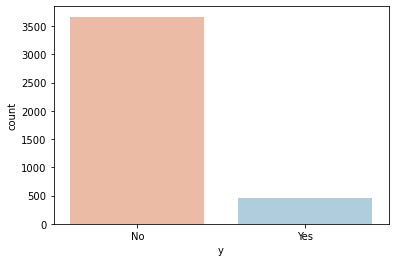

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure()
sns.countplot(x='y', data=bank_data_set, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

En la gráfica se observa que el conjunto de datos tiene aproximadamente 7 veces más instancias de la clase "No"
que de la clase "Sí". Debido a esto se decide que se considerará la métrica de precisión, pues esta permite mostrar el
comportamiento de la detección correcta de las clases respecto al total de clases.

### Conclusión

Las métricas de puntuación no permiten medir el comportamiento real de un modelo ante un conjunto de datos no balanceado. Por otro lado, la métrica de precisión permite medir más certeramente el comportamiento de un modelo ante esta distribución de las clases en el conjunto de datos.
El método de valildación cruzada permite obtener hyper parámetros optimizados para una métrica específica a costa de procesamiento computacional.
El modelo de regresión logística muestra el mejor resultado respecto a la clasificación binaria del conjunto de datos empleado.

## Referencias

1) Medium. 2021. Metrics to Evaluate your Machine Learning Algorithm. [en línea] Disponible en: <https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234> [Accesado 20 de Febrero 2021].

2) Medium. 2021. 20 Popular Machine Learning Metrics. Part 1: Classification & Regression Evaluation Metrics. [en línea] Disponible en: <https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce> [Accesado 20 de Febrero 2021].

3) Tutorialspoint.com. 2021. Machine Learning - Performance Metrics - Tutorialspoint. [en línea] Disponible en: <https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_algorithms_performance_metrics.htm> [Accesado 20  de Febrero 2021].

4) S. M. Susheel Kumar, D. Laxkar, S. Adhikari, y V. Vijayarajan, «Assessment of various supervised learning algorithms using different performance metrics», IOP Conf. Ser.: Mater. Sci. Eng., vol. 263, p. 042087, nov. 2017, doi: 10.1088/1757-899x/263/4/042087.

5) Scikit-learn.org. 2021. 3.1. Cross-validation: evaluating estimator performance — scikit-learn 0.24.1 documentation. [en línea] Disponible en: <https://scikit-learn.org/stable/modules/cross_validation.html> [Accesado el 22 de Febrero 2021].

6) Briega, R., 2021. Machine Learning con Python - Sobreajuste. [en línea] Relopezbriega.github.io. Disponible en: <https://relopezbriega.github.io/blog/2016/05/29/machine-learning-con-python-sobreajuste> [Accesado el 18 de Febrero 2021].

7) Scikit-learn.org. 2021. sklearn.model_selection.GridSearchCV — scikit-learn 0.24.1 documentation. [en línea] Disponible en: <https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html> [Accesado el 20 de Febrero 2021].

8) Brownlee, J., 2021. Perceptron Algorithm for Classification in Python. [en línea] Machine Learning Mastery. Disponible en: <https://machinelearningmastery.com/perceptron-algorithm-for-classification-in-python/> [Accesado el 21 de Febrero de 2021].